In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Import Data

In [71]:
train=pd.read_csv('train_dataset.csv')

test=pd.read_csv('test_dataset.csv')



test.max()

tconst                                     tt9904802
primaryTitle          ¡A todo tren! Destino Asturias
originalTitle                               Éternité
startYear                                       2021
runtimeMinutes                                  1260
Animation                                          1
Fantasy                                            1
GameShow                                           0
History                                            1
Music                                              1
Musical                                            1
News                                               0
SciFi                                              1
Sport                                              1
War                                                1
Western                                            1
averageRating                                    9.6
numVotes                                   1095010.0
budget                                     380

## Models

**Linear Regression - Predicting Continuous Rating (0.0-10.0)**

In [72]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula = 
                ''' averageRating ~ 
                    yearsSinceProduced + 
                    runtimeMinutes + 
                    numVotes + 
                    budget + 
                    revenue + 
                    isTopActor + 
                    isTopDirector + 
                    Animation + 
                    Fantasy + 
                    History + 
                    Music + 
                    Musical + 
                    News + 
                    SciFi + 
                    Sport + 
                    War + 
                    Western
                ''', data=train).fit()
print(model_1 .summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     72.11
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          4.75e-225
Time:                        08:20:50   Log-Likelihood:                -8239.9
No. Observations:                5550   AIC:                         1.652e+04
Df Residuals:                    5532   BIC:                         1.664e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.6584      0

In [73]:
# Calculate Variance Inflation Factor for each explanatory variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  # the dataframe passed to VIF must include the intercept term. We add it here.
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [74]:
cols = ['yearsSinceProduced','runtimeMinutes','numVotes','budget','revenue','isTopActor','isTopDirector','Animation','Fantasy','History','Music','Musical','News','SciFi','Sport','War','Western']
VIF(train, cols)

/Users/clemencebilliemaz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


yearsSinceProduced    1.033326
runtimeMinutes        1.187831
numVotes              1.601245
budget                2.389393
revenue               2.521287
isTopActor            1.437008
isTopDirector         1.519049
Animation             1.050892
Fantasy               1.024426
History               1.038909
Music                 1.013058
Musical               1.017937
News                  1.004239
SciFi                 1.070428
Sport                 1.007659
War                   1.019650
Western               1.002478
dtype: float64

We observe that there is no strong multicollinearity between any of the non-categorical features. However, we remove the features that have a p-value>0.05 ie 'Revenue', 'Musical' and 'yearsSinceProduced' and 'Western'.

In [75]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula = 
                ''' averageRating ~ 
                    runtimeMinutes + 
                    numVotes + 
                    budget + 
                    isTopActor + 
                    isTopDirector + 
                    Animation + 
                    Fantasy + 
                    History + 
                    Music + 
                    News + 
                    SciFi + 
                    Sport + 
                    War 
                ''', data=train).fit()
print(model_1 .summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     93.75
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          1.55e-227
Time:                        08:20:50   Log-Likelihood:                -8243.2
No. Observations:                5550   AIC:                         1.651e+04
Df Residuals:                    5536   BIC:                         1.661e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6001      0.067     83.

In [76]:
cols = ['runtimeMinutes','numVotes','budget','isTopActor','isTopDirector','Animation','Fantasy','History','Music','News','SciFi','Sport','War']
VIF(train, cols)

/Users/clemencebilliemaz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


runtimeMinutes    1.173103
numVotes          1.474712
budget            1.149126
isTopActor        1.407160
isTopDirector     1.501176
Animation         1.050131
Fantasy           1.024336
History           1.035427
Music             1.009645
News              1.003886
SciFi             1.066046
Sport             1.006169
War               1.018910
dtype: float64

We observe that there is no strong multicollinearity between any of the non-categorical features. The linear regression model is:

$$Y= 5.6001 + 0.0050*runtimeMinutes+ 2.393\cdot10^{-6}*numVotes -1.298\cdot10^{-9}*budget -0.3050* isTopActor +0.4255*isTopDirector+0.1547*Animation-0.3236*Fantasy+0.5569*History+0.3109*Music+0.9429*News-0.5451*SciFi+0.3606*Sport+02643*War$$ <br>

In [77]:
# Making predictions on the test set with the model
predictions_lr=model_1.predict(test)

In [78]:
X_train= train.drop(columns=["averageRating", "tconst", "primaryTitle", "originalTitle", "startYear"])
y_train=train['averageRating']
X_test= test.drop(columns=["averageRating", "tconst", "primaryTitle", "originalTitle", "startYear"])
y_test=test['averageRating']

In [79]:
# Computing OSR2

from sklearn.metrics import r2_score,mean_absolute_error

comparison={'Linear Regression':['{:.3f}'.format(r2_score(y_test,model_1.predict(test)))]}
comparison_data=pd.DataFrame(data=comparison, index=['OSR2'])
comparison_data


,Linear Regression
OSR2,0.106


**CART algorithm**

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88,max_depth=30)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=30, min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0....
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.0

In [81]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']


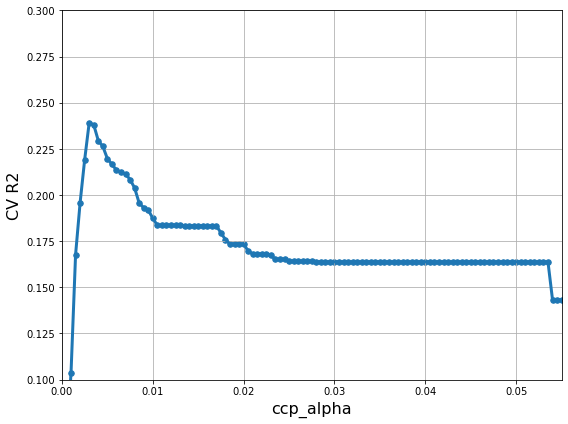

In [82]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.055])
plt.ylim([0.1, 0.3])

plt.tight_layout()
plt.show()

In [83]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.003}


In [84]:
from sklearn.metrics import r2_score

print('CV R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, dtr_cv.predict(X_test)), 5))

CV R2: 0.23921
OSR2: 0.15322


## Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 o

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [86]:
rf.verbose = False
print('OSR2:', round(r2_score(y_test, rf.predict(X_test)), 5))

OSR2: 0.19589


## Random Forest Regressor with CV

In [87]:
import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 230.45 s


In [88]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

R2_scores

array([0.18765855, 0.2387202 , 0.27170524, 0.28899008, 0.29729718,
       0.30022914, 0.29933074, 0.29821239, 0.29723262, 0.29861121,
       0.29712763, 0.29634251, 0.29538221, 0.29445289, 0.2950953 ,
       0.29281602, 0.29250134, 0.29183798])

(0.1, 0.4)

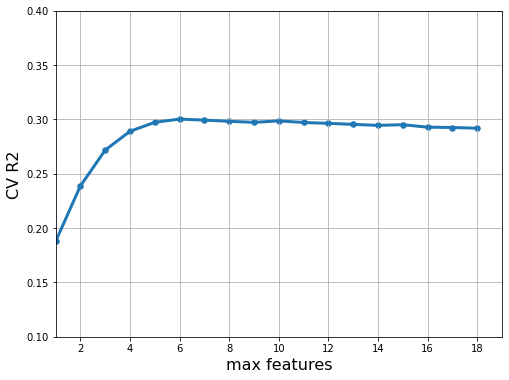

In [89]:
plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.1, 0.4])

In [90]:
print(rf_cv.best_params_)

{'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [91]:
print('CV R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, rf_cv.predict(X_test)), 5))

CV R2: 0.30023
OSR2: 0.1952


### Feature Importance

In [92]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,runtimeMinutes,21.8
1,Animation,0.7
2,Fantasy,0.6
3,GameShow,0.0
4,History,0.7
5,Music,0.2
6,Musical,0.0
7,News,0.0
8,SciFi,1.5
9,Sport,0.2


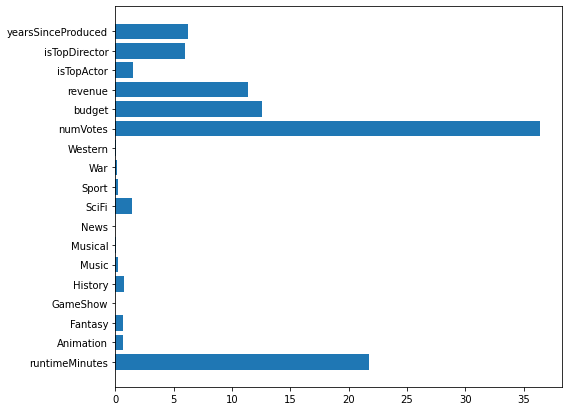

In [93]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

## Gradient Boosting Regressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, random_state=88, verbose=1,
                                max_leaf_nodes=10) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3927            9.81s
         2           1.3921            9.83s
         3           1.3916           10.25s
         4           1.3911           10.31s
         5           1.3905           10.14s
         6           1.3900            9.99s
         7           1.3894            9.91s
         8           1.3889            9.83s
         9           1.3884            9.78s
        10           1.3878            9.76s
        20           1.3825            9.50s
        30           1.3773            9.37s
        40           1.3721            9.28s
        50           1.3671            9.22s
        60           1.3621            9.18s
        70           1.3573            9.13s
        80           1.3525            9.08s
        90           1.3478            9.03s
       100           1.3432            9.00s
       200           1.3011            8.50s
       300           1.2653            7.99s
       40

GradientBoostingRegressor(learning_rate=0.001, max_leaf_nodes=10,
                          n_estimators=2000, random_state=88, verbose=1)

In [95]:
print('OSR2:', round(r2_score(y_test, gbr.predict(X_test)), 5))

OSR2: 0.1652


## Gradient Boosting Regressor with CV

In [ ]:
grid_values = {'max_leaf_nodes': np.linspace(2, 10, 9, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': np.logspace(9, 16, num=8, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'random_state': [88]}

tic = time.time()

gbr = GradientBoostingRegressor()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring='r2', cv=5)
gbr_cv.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

In [ ]:
n_estimators = gbr_cv.cv_results_['param_n_estimators'].data
R2_scores = gbr_cv.cv_results_['mean_test_score']

In [ ]:
plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(gbr_cv.best_params_)

In [ ]:
print('CV R2:', round(gbr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, gbr_cv.predict(X_test)), 5))

In [ ]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*gbr_cv.best_estimator_.feature_importances_}).round(1)

In [ ]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*gbr_cv.best_estimator_.feature_importances_)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
comparison_data = {'Linear Regression': ['{:.3f}'.format(r2_score(y_test, model_1.predict(X_test))),
                                         '{:.4f}'.format(mean_squared_error(y_test, model_1.predict(X_test))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, model_1.predict(X_test)))],
                   'Decision Tree Regressor': ['{:.3f}'.format(r2_score(y_test, dtr_cv.predict(X_test))),
                                               '{:.4f}'.format(mean_squared_error(y_test, dtr_cv.predict(X_test))),
                                               '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv.predict(X_test)))],
                   'Random Forest': ['{:.3f}'.format(r2_score(y_test, rf_cv.predict(X_test))),
                                     '{:.4f}'.format(mean_squared_error(y_test, rf_cv.predict(X_test))),
                                     '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))], 
                   'Gradient Boosted Trees': ['{:.3f}'.format(r2_score(y_test, gbr_cv.predict(X_test))),
                                              '{:.4f}'.format(mean_squared_error(y_test, gbr_cv.predict(X_test))),
                                              '{:.3f}'.format(mean_absolute_error(y_test, gbr_cv.predict(X_test)))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample MSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

In [ ]:
comparison_table=comparison_table.transpose()
comparison_table

**Bootstrap**

In [ ]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [ ]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

In [ ]:
def boostrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [ ]:
# Visualization
def boostrap_plot(boostrap,model_osr2, y_test):
    fig, axs = plt.subplots(ncols=2, figsize=(12,5))
    axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
    axs[1].set_xlabel('Boot accuracy- Test Set accuracy', fontsize=16)
    axs[0].set_ylabel('Count', fontsize=16)
    axs[0].hist(boostrap.iloc[:,0], bins=20,edgecolor='blue', linewidth=2,color = "yellow")
    
    axs[1].hist(boostrap.iloc[:,0]-model_osr2, bins=20,edgecolor='blue', linewidth=2,color = "yellow")
    
    CI= np.quantile(boostrap.iloc[:,0]-model_osr2,np.array([0.025,0.975]))
    axs[1].vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
    axs[1].vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

def bias(boostrap,model_osr2):
    return boostrap.mean()-model_osr2

def variance(boostrap,model_osr2):
    return np.mean((boostrap.mean()-model_osr2)**2)

def performance_model(boostrap,model_osr2,model_name=''):
    CI= np.quantile(boostrap.iloc[:,0],np.array([0.025,0.975]))
    return pd.DataFrame({'OSR2':model_osr2,
                        'Bias': float(bias(boostrap,model_osr2)),
                        'Variance':float(variance(boostrap,model_osr2)),
                        'CI Lower Bound': CI[0],
                        'CI Upper Bound':CI[1]},
                       index=[model_name])

In [ ]:
bs_lr=boostrap_validation(X_test,y_test,y_train,model_1,metrics_list=[OS_R_squared],sample = 5000)
lr_perf=performance_model(bs_lr,r2_score(y_test, model_1.predict(X_test)),model_name='Linear regression')

In [ ]:
lr_perf

In [ ]:
bs_cart=boostrap_validation(X_test,y_test,y_train,dtr_cv,metrics_list=[OS_R_squared],sample = 5000)
cart_perf=performance_model(bs_cart,r2_score(y_test, dtr_cv.predict(X_test)),model_name='CART')

In [ ]:
bs_rf=boostrap_validation(X_test,y_test,y_train,rf_cv,metrics_list=[OS_R_squared],sample = 5000)
rf_perf=performance_model(bs_rf,r2_score(y_test, rf_cv.predict(X_test)),model_name='Random Forest')

In [ ]:
bs_gb=boostrap_validation(X_test,y_test,y_train,gbr_cv,metrics_list=[OS_R_squared],sample = 5000)
gb_perf=performance_model(bs_gb,r2_score(y_test, rf_cv.predict(X_test)),model_name='Gradient Boosting')

In [ ]:
bs_results=pd.concat([lr_perf,cart_perf,rf_perf,gb_perf])
bs_results

In [ ]:
indexes=[]
for index,row in bs_results.iterrows():
    indexes.append(index)
    plt.plot((row['CI Lower Bound'],row['CI Upper Bound']),(index,index),'ro-',color='blue')
plt.yticks(range(len(indexes)),indexes)     
plt.title('OSR2 with 95% confidence interval')

In [ ]:


indexes = []
for index, row in bs_results.iterrows():
    indexes.append(index)

    plt.plot((row['CI Lower Bound'],row['CI Upper Bound']),(index,index),'ro-',color='white')
plt.yticks(range(len(indexes)), indexes)
plt.title('Model OSR2 with 95% confidence intervals')